타임즈넷의 기본원리를 이해하기 위해 만들어본 테스트 코드입니다.

실제 타임즈넷모델을 돌리지는 않았고 FFT(고속퓨리에 변환함수)를 사용하여

QQQ의 20년간 차트를 16개의 주파수로 변환해보았습니다.

아래로 내려가면서 데이터의 경향성을 제거하고 주파수성분만 남기기위해서

로그변환 및 정사영(선형회귀분석하여 좌표축이동)하는 전처리를 하였습니다.

그 아래 전일대비 증감률을 사용하여 수익률의 추이를 보려했는데,

별성과가 없었습니다.

고맙습니다.

In [ ]:
# import yfinance as yf

# # QQQ 티커 설정
# ticker = 'QQQ'

# # QQQ의 상장일은 1999-03-10이므로 이 날짜부터 현재까지 데이터를 다운로드
# start_date = '2000-01-01'
# end_date = None  # None으로 설정하면 현재 날짜까지 데이터를 다운로드

# # 데이터 다운로드
# df = yf.download(ticker, start=start_date, end=end_date)

# # 다운로드된 데이터를 qqq_2000.csv 파일로 저장
# df.to_csv('qqq_2000.csv')

# print("Data saved to qqq_2000.csv")


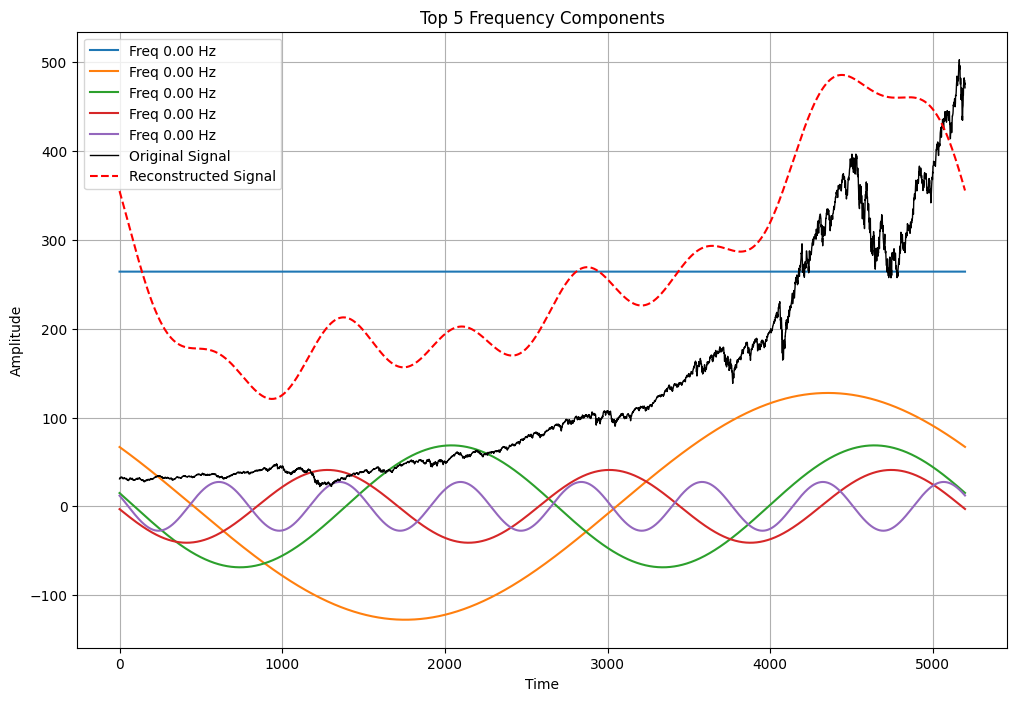

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기
adj_close_prices = data['Adj Close'].values
N = len(adj_close_prices)

# 2. FFT를 사용한 주파수 분석
yf = fft(adj_close_prices)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 3. 주요 주파수 성분 추출 (n개의 성분)
n = 5  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 4. 사인 및 코사인 함수로 변환
reconstructed_signal = np.zeros(N)
t = np.arange(N)

plt.figure(figsize=(12, 8))
for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    cos_component = amplitude * np.cos(2.0 * np.pi * frequency * t + phase)
    sin_component = amplitude * np.sin(2.0 * np.pi * frequency * t + phase)
    
    # 시그널 재구성
    reconstructed_signal += cos_component
    
    # 개별 사인/코사인 함수를 플로팅
    plt.plot(t, cos_component, label=f'Freq {frequency:.2f} Hz')

# 5. 원본 신호와 재구성된 신호 플로팅
plt.plot(t, adj_close_prices, label='Original Signal', color='black', linewidth=1)
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', linestyle='--', color='red', linewidth=1.5)

plt.title(f'Top {n} Frequency Components')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


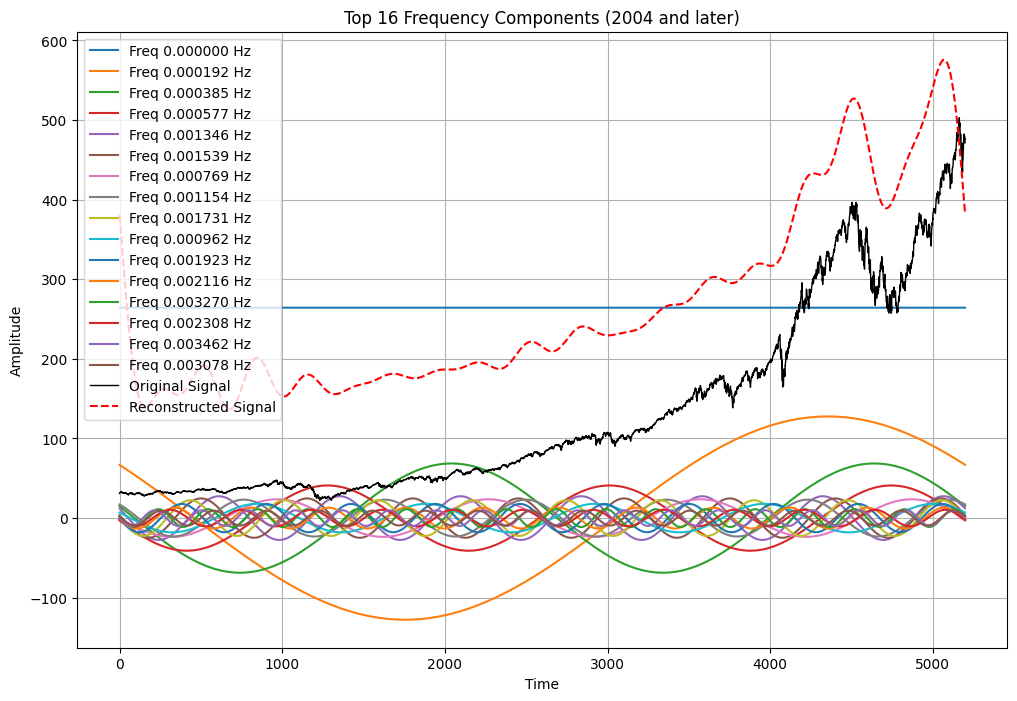

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기
adj_close_prices = data['Adj Close'].values
N = len(adj_close_prices)

# 2. FFT를 사용한 주파수 분석
yf = fft(adj_close_prices)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 3. 주요 주파수 성분 추출 (n개의 성분)
n = 16  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 4. 사인 및 코사인 함수로 변환
reconstructed_signal = np.zeros(N)
t = np.arange(N)

plt.figure(figsize=(12, 8))
for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    cos_component = amplitude * np.cos(2.0 * np.pi * frequency * t + phase)
    
    # 시그널 재구성
    reconstructed_signal += cos_component
    
    # 개별 사인/코사인 함수를 플로팅
    plt.plot(t, cos_component, label=f'Freq {frequency:.6f} Hz')

# 5. 원본 신호와 재구성된 신호 플로팅
plt.plot(t, adj_close_prices, label='Original Signal', color='black', linewidth=1)
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', linestyle='--', color='red', linewidth=1.5)

plt.title(f'Top {n} Frequency Components (2004 and later)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


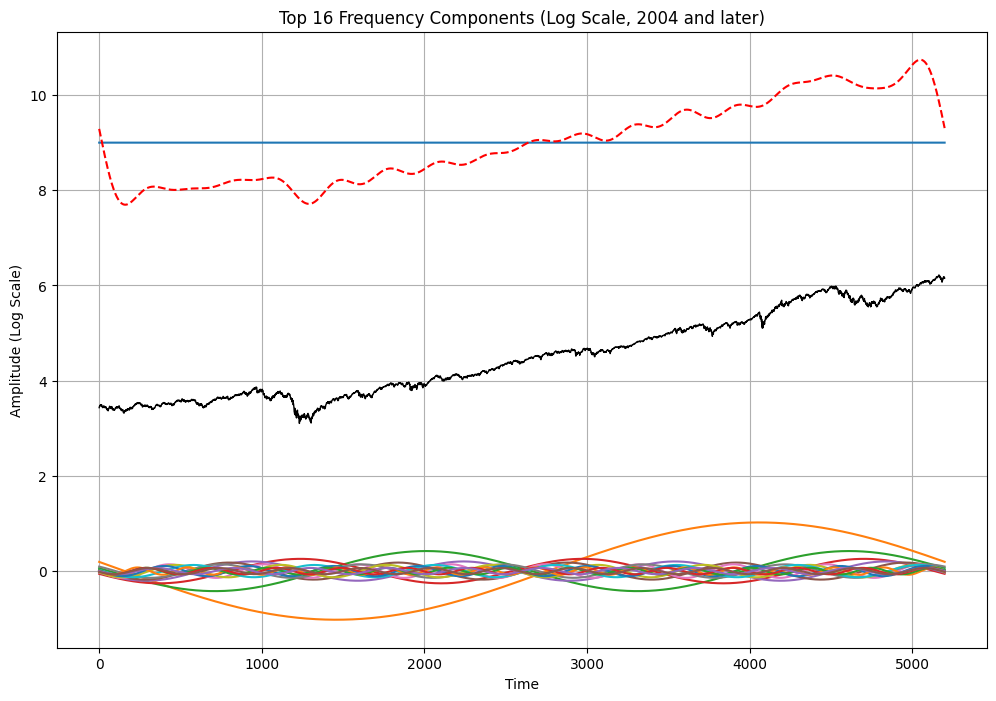

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기 및 로그 변환
adj_close_prices = data['Adj Close'].values
log_adj_close_prices = np.log(adj_close_prices)  # 로그 변환

N = len(log_adj_close_prices)

# 2. FFT를 사용한 주파수 분석
yf = fft(log_adj_close_prices)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 3. 주요 주파수 성분 추출 (n개의 성분)
n = 16  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 4. 선택된 주파수 성분만으로 신호 재구성
filtered_yf = np.zeros_like(yf)
filtered_yf[indices] = yf[indices]
filtered_yf[-indices] = yf[-indices]  # 음의 주파수 성분도 추가

reconstructed_signal = ifft(filtered_yf).real  # 역 FFT를 사용하여 신호 재구성

# 5. 원본 신호와 재구성된 신호 플로팅
plt.figure(figsize=(12, 8))
plt.plot(log_adj_close_prices, color='black', linewidth=1, label='Original Signal (Log)')
plt.plot(reconstructed_signal, linestyle='--', color='red', linewidth=1.5, label='Reconstructed Signal')

plt.title(f'Top {n} Frequency Components (Log Scale, 2004 and later)')
plt.xlabel('Time')
plt.ylabel('Amplitude (Log Scale)')
plt.grid(True)
plt.show()


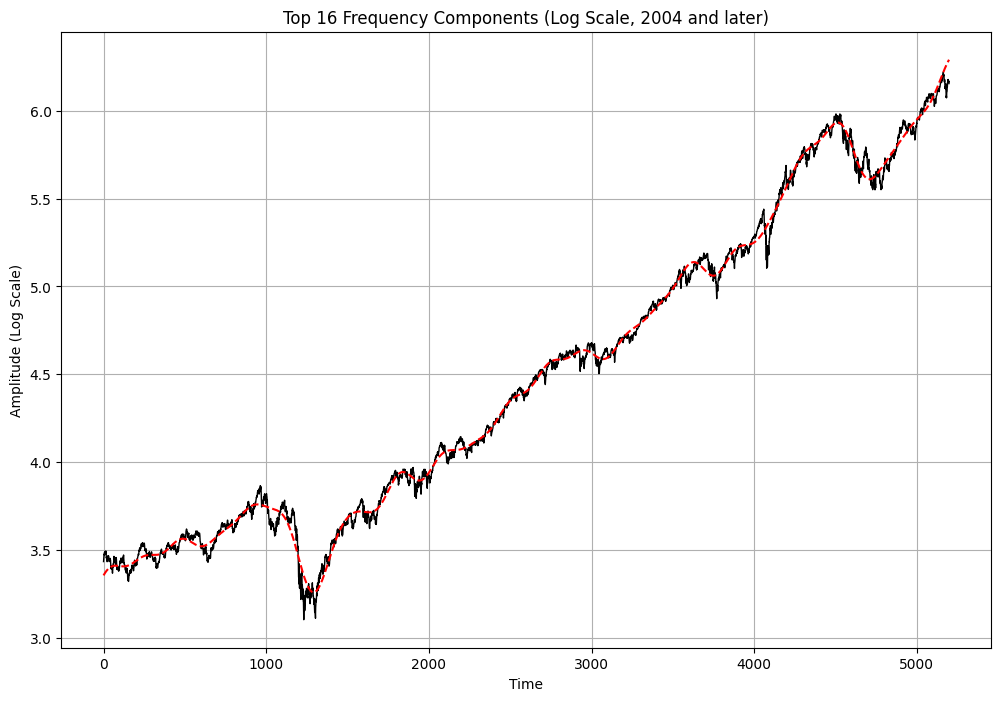

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from sklearn.linear_model import LinearRegression

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기 및 로그 변환
adj_close_prices = data['Adj Close'].values
log_adj_close_prices = np.log(adj_close_prices)  # 로그 변환

# 2. 선형 회귀를 통해 로그 변환된 값에 대한 정사영 계산
t = np.arange(len(log_adj_close_prices)).reshape(-1, 1)
model = LinearRegression()
model.fit(t, log_adj_close_prices)
trend = model.predict(t)

# 로그 변환된 값에서 추세(정사영)를 제거한 값 계산
detrended_prices = log_adj_close_prices - trend

# 3. FFT를 사용한 주파수 분석
N = len(detrended_prices)
yf = fft(detrended_prices)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 4. 주요 주파수 성분 추출 (n개의 성분)
n = 16  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 5. 선택된 주파수 성분만으로 신호 재구성
filtered_yf = np.zeros_like(yf)
filtered_yf[indices] = yf[indices]
filtered_yf[-indices] = yf[-indices]  # 음의 주파수 성분도 추가

reconstructed_signal = ifft(filtered_yf).real  # 역 FFT를 사용하여 신호 재구성
reconstructed_signal += trend  # 원래 추세를 다시 추가하여 최종 신호 구성

# 6. 원본 신호와 재구성된 신호 플로팅
plt.figure(figsize=(12, 8))
plt.plot(log_adj_close_prices, color='black', linewidth=1, label='Original Signal (Log)')
plt.plot(reconstructed_signal, linestyle='--', color='red', linewidth=1.5, label='Reconstructed Signal')

plt.title(f'Top {n} Frequency Components (Log Scale, 2004 and later)')
plt.xlabel('Time')
plt.ylabel('Amplitude (Log Scale)')
plt.grid(True)
plt.show()


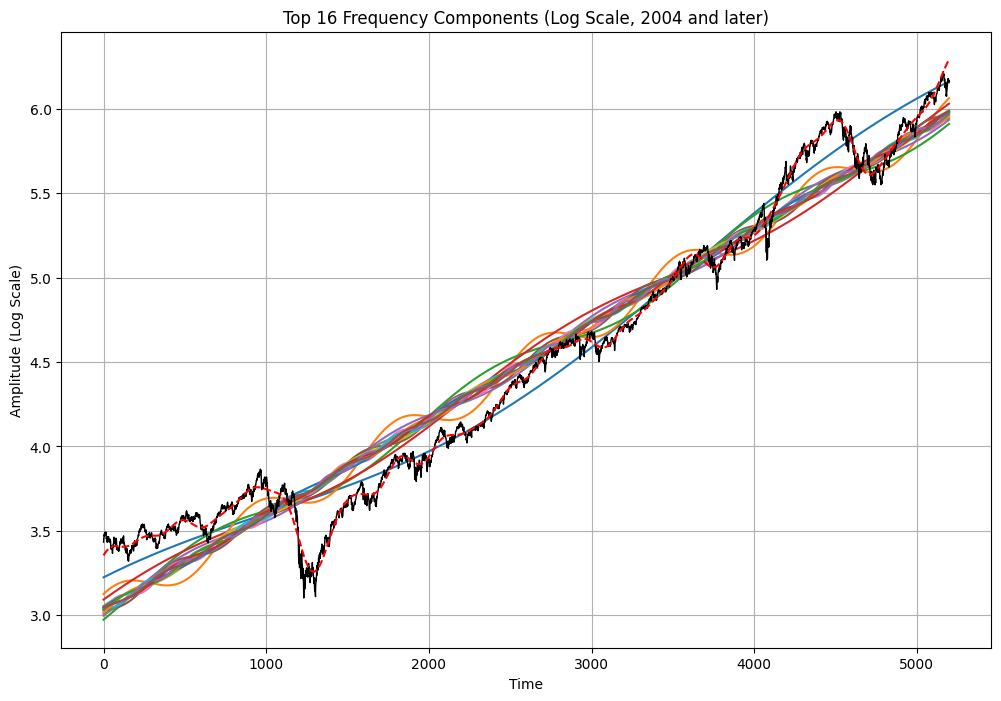

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from sklearn.linear_model import LinearRegression

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기 및 로그 변환
adj_close_prices = data['Adj Close'].values
log_adj_close_prices = np.log(adj_close_prices)  # 로그 변환

# 2. 선형 회귀를 통해 로그 변환된 값에 대한 정사영 계산
t = np.arange(len(log_adj_close_prices)).reshape(-1, 1)
model = LinearRegression()
model.fit(t, log_adj_close_prices)
trend = model.predict(t)

# 로그 변환된 값에서 추세(정사영)를 제거한 값 계산
detrended_prices = log_adj_close_prices - trend

# 3. FFT를 사용한 주파수 분석
N = len(detrended_prices)
yf = fft(detrended_prices)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 4. 주요 주파수 성분 추출 (n개의 성분)
n = 16  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 5. 개별 주파수 성분으로 분해 및 시각화
reconstructed_signal = np.zeros(N)

plt.figure(figsize=(12, 8))
for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    # 개별 주파수 성분의 코사인 함수
    cos_component = amplitude * np.cos(2.0 * np.pi * frequency * np.arange(N) + phase)
    
    # 신호 재구성에 사용
    reconstructed_signal += cos_component
    
    # 개별 성분 플로팅
    plt.plot(t, cos_component + trend, label=f'Freq {frequency:.2f} Hz')

# 6. 재구성된 신호에 원래 추세 추가
reconstructed_signal_with_trend = reconstructed_signal + trend

# 7. 원본 신호와 재구성된 신호 플로팅
plt.plot(t, log_adj_close_prices, color='black', linewidth=1, label='Original Signal (Log)')
plt.plot(t, reconstructed_signal_with_trend, linestyle='--', color='red', linewidth=1.5, label='Reconstructed Signal')

plt.title(f'Top {n} Frequency Components (Log Scale, 2004 and later)')
plt.xlabel('Time')
plt.ylabel('Amplitude (Log Scale)')
plt.grid(True)
plt.show()


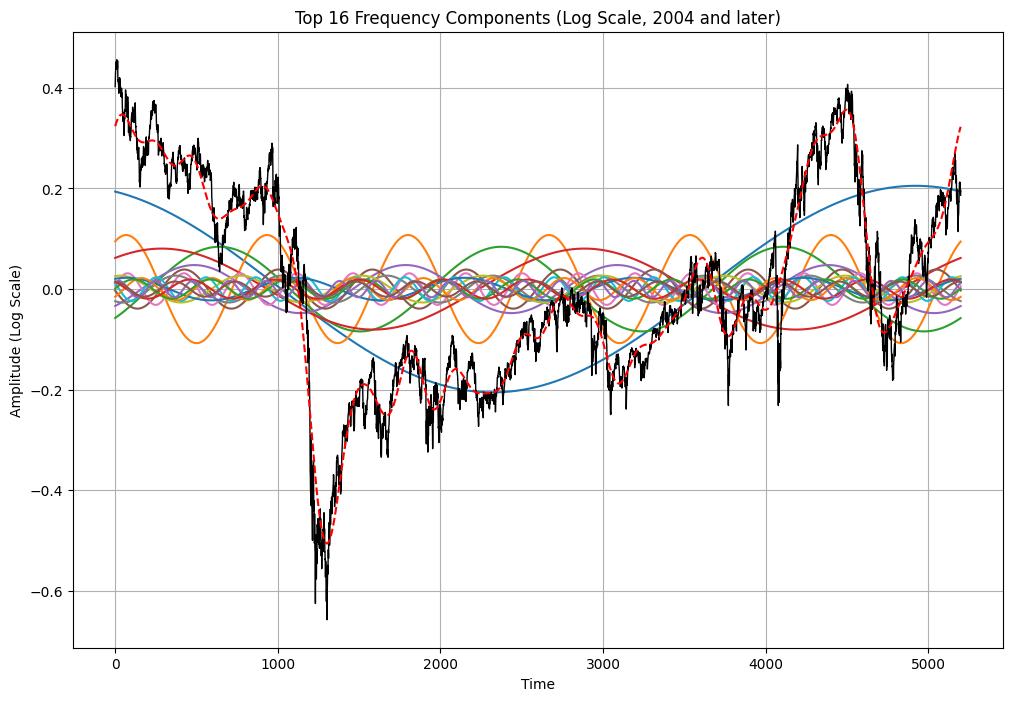

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from sklearn.linear_model import LinearRegression

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기 및 로그 변환
adj_close_prices = data['Adj Close'].values
log_adj_close_prices = np.log(adj_close_prices)  # 로그 변환

# 2. 선형 회귀를 통해 로그 변환된 값에 대한 정사영 계산
t = np.arange(len(log_adj_close_prices)).reshape(-1, 1)
model = LinearRegression()
model.fit(t, log_adj_close_prices)
trend = model.predict(t)

# 로그 변환된 값에서 추세(정사영)를 제거한 값 계산
detrended_prices = log_adj_close_prices - trend

# 3. FFT를 사용한 주파수 분석
N = len(detrended_prices)
yf = fft(detrended_prices)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 4. 주요 주파수 성분 추출 (n개의 성분)
n = 16  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 5. 개별 주파수 성분으로 분해 및 시각화
reconstructed_signal = np.zeros(N)

plt.figure(figsize=(12, 8))
for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    # 개별 주파수 성분의 코사인 함수
    cos_component = amplitude * np.cos(2.0 * np.pi * frequency * np.arange(N) + phase)
    
    # 신호 재구성에 사용
    reconstructed_signal += cos_component
    
    # 개별 성분 플로팅
    plt.plot(t, cos_component, label=f'Freq {frequency:.2f} Hz')

# 6. 원본 신호와 재구성된 신호 플로팅 (추세 없이)
plt.plot(t, detrended_prices, color='black', linewidth=1, label='Detrended Signal (Log)')
plt.plot(t, reconstructed_signal, linestyle='--', color='red', linewidth=1.5, label='Reconstructed Signal')

plt.title(f'Top {n} Frequency Components (Log Scale, 2004 and later)')
plt.xlabel('Time')
plt.ylabel('Amplitude (Log Scale)')
plt.grid(True)
plt.show()


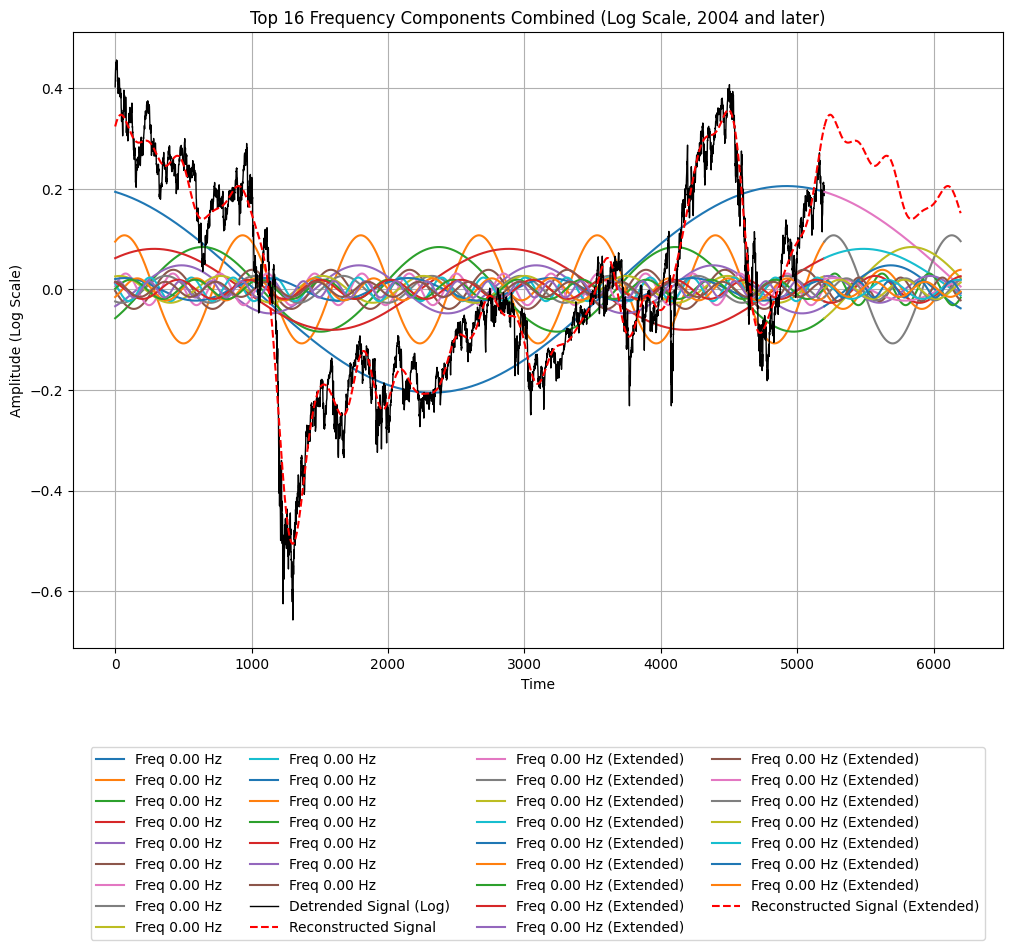

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from sklearn.linear_model import LinearRegression

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기 및 로그 변환
adj_close_prices = data['Adj Close'].values
log_adj_close_prices = np.log(adj_close_prices)  # 로그 변환

# 2. 선형 회귀를 통해 로그 변환된 값에 대한 정사영 계산
t = np.arange(len(log_adj_close_prices)).reshape(-1, 1)
model = LinearRegression()
model.fit(t, log_adj_close_prices)
trend = model.predict(t)

# 로그 변환된 값에서 추세(정사영)를 제거한 값 계산
detrended_prices = log_adj_close_prices - trend

# 3. FFT를 사용한 주파수 분석
N = len(detrended_prices)
yf = fft(detrended_prices)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 4. 주요 주파수 성분 추출 (n개의 성분)
n = 16  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 5. 개별 주파수 성분으로 분해 및 시각화
reconstructed_signal = np.zeros(N)

plt.figure(figsize=(12, 8))
for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    # 개별 주파수 성분의 코사인 함수
    cos_component = amplitude * np.cos(2.0 * np.pi * frequency * np.arange(N) + phase)
    
    # 신호 재구성에 사용
    reconstructed_signal += cos_component
    
    # 개별 성분 플로팅
    plt.plot(t, cos_component, label=f'Freq {frequency:.2f} Hz')

# 원본 신호와 재구성된 신호 플로팅 (추세 없이)
plt.plot(t, detrended_prices, color='black', linewidth=1, label='Detrended Signal (Log)')
plt.plot(t, reconstructed_signal, linestyle='--', color='red', linewidth=1.5, label='Reconstructed Signal')

# 두 번째 플롯의 주요 주파수 성분을 1000개 타임 스텝으로 플로팅
extended_N = 1000
extended_t = np.arange(extended_N)
reconstructed_signal_extended = np.zeros(extended_N)

for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    # 개별 주파수 성분의 코사인 함수 (1000개 타임 스텝)
    cos_component_extended = amplitude * np.cos(2.0 * np.pi * frequency * extended_t + phase)
    
    # 신호 재구성에 사용
    reconstructed_signal_extended += cos_component_extended
    
    # 개별 성분 플로팅 (1000개 타임 스텝)
    plt.plot(extended_t + len(t), cos_component_extended, label=f'Freq {frequency:.2f} Hz (Extended)')

# 재구성된 신호 플로팅 (추세 없이, 1000개 타임 스텝)
plt.plot(extended_t + len(t), reconstructed_signal_extended, linestyle='--', color='red', linewidth=1.5, label='Reconstructed Signal (Extended)')

plt.title(f'Top {n} Frequency Components Combined (Log Scale, 2004 and later)')
plt.xlabel('Time')
plt.ylabel('Amplitude (Log Scale)')
plt.grid(True)

# 범례를 아래로 이동
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

plt.show()


Data saved to 'signal_data_extended.csv'


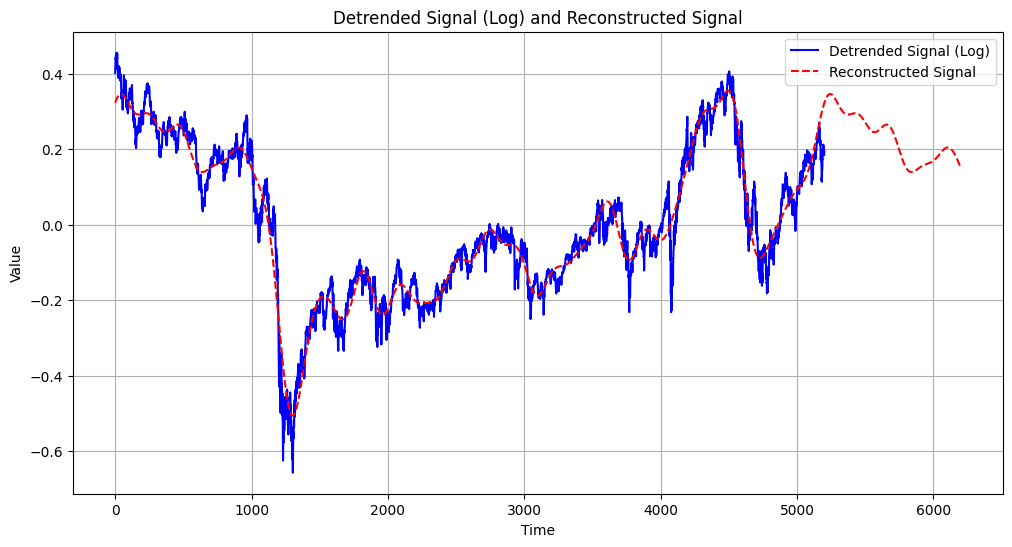

Restored prices saved to 'restored_prices_extended.csv'


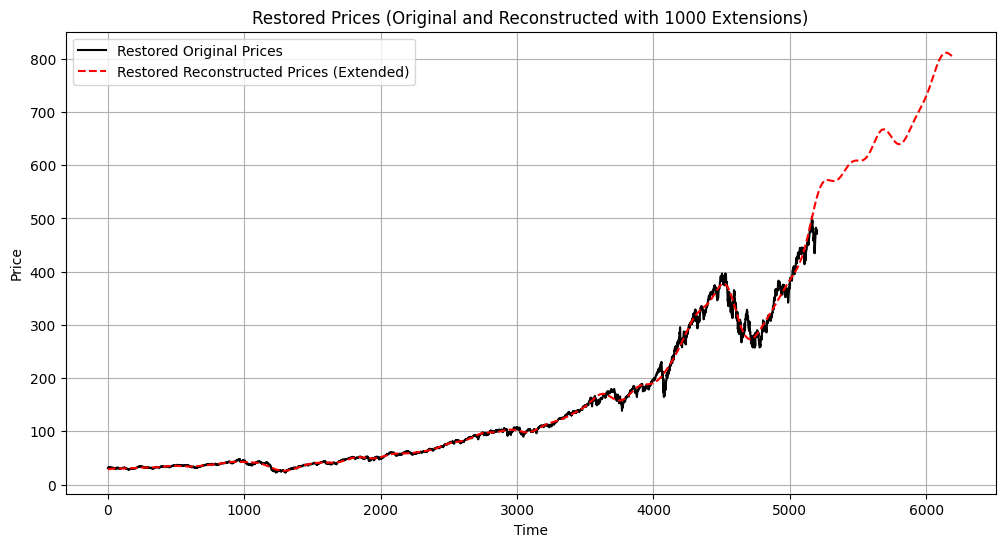

In [22]:
## 2004-01-01~2024-08-30일 QQQ데이터 ffn 
# n =16 : 주요 주파수 추출갯수
# 추가로 1000일간 추출주파수 프로젝션

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from sklearn.linear_model import LinearRegression

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기 및 로그 변환
adj_close_prices = data['Adj Close'].values
log_adj_close_prices = np.log(adj_close_prices)  # 로그 변환

# 2. 선형 회귀를 통해 로그 변환된 값에 대한 정사영 계산
t = np.arange(len(log_adj_close_prices)).reshape(-1, 1)
model = LinearRegression()
model.fit(t, log_adj_close_prices)
trend = model.predict(t)

# 로그 변환된 값에서 추세(정사영)를 제거한 값 계산
detrended_prices = log_adj_close_prices - trend

# 3. FFT를 사용한 주파수 분석
N = len(detrended_prices)
yf = fft(detrended_prices)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 4. 주요 주파수 성분 추출 (n개의 성분)
n = 16  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 5. 개별 주파수 성분으로 분해 및 시각화
reconstructed_signal = np.zeros(N)
for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    # 개별 주파수 성분의 코사인 함수
    cos_component = amplitude * np.cos(2.0 * np.pi * frequency * np.arange(N) + phase)
    
    # 신호 재구성에 사용
    reconstructed_signal += cos_component

# 6. 추가 1000개 타임 스텝 신호 생성
extended_N = 1000
extended_t = np.arange(extended_N)
reconstructed_signal_extended = np.zeros(extended_N)

for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    # 개별 주파수 성분의 코사인 함수 (1000개 타임 스텝)
    cos_component_extended = amplitude * np.cos(2.0 * np.pi * frequency * extended_t + phase)
    
    # 신호 재구성에 사용
    reconstructed_signal_extended += cos_component_extended

# 7. 원본 신호와 재구성된 신호를 CSV 파일로 저장 (1000개 추가 타임 스텝 포함)
# 추가된 1000개 신호를 포함한 전체 데이터 생성
full_reconstructed_signal = np.concatenate([reconstructed_signal, reconstructed_signal_extended])
full_t = np.arange(N + extended_N)

output_data_extended = pd.DataFrame({
    'Time': full_t,
    'Detrended Signal (Log)': np.concatenate([detrended_prices, np.full(extended_N, np.nan)]),  # 연장된 부분은 NaN으로 채움
    'Reconstructed Signal': full_reconstructed_signal
})

# CSV 파일로 저장
output_data_extended.to_csv('signal_data_extended.csv', index=False)

print("Data saved to 'signal_data_extended.csv'")

# ----------------------------
# 데이터 플로팅
# ----------------------------
plt.figure(figsize=(12, 6))

plt.plot(output_data_extended['Time'], output_data_extended['Detrended Signal (Log)'], color='blue', label='Detrended Signal (Log)')
plt.plot(output_data_extended['Time'], output_data_extended['Reconstructed Signal'], color='red', linestyle='--', label='Reconstructed Signal')

plt.title('Detrended Signal (Log) and Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

# ----------------------------
# 복원 과정
# ----------------------------

# 1. 저장된 데이터 로드
restored_data = pd.read_csv('signal_data_extended.csv')

# 2. 기존 데이터와 추가된 1000개 타임 스텝 분리
N = len(restored_data) - 1000  # 원래 데이터 길이 추정

# 3. 저장된 로그 변환된 데이터 로드
detrended_prices = restored_data['Detrended Signal (Log)'].values[:N]
reconstructed_signal = restored_data['Reconstructed Signal'].values

# 4. 추세 재계산
# 추세를 복원하기 위해서 선형 회귀 모델 사용
t = np.arange(N).reshape(-1, 1)
model = LinearRegression()
model.fit(t, log_adj_close_prices)  # 추세를 복원
trend = model.predict(t)

# 5. 로그 변환 역변환 (기존 신호)
restored_original_prices = np.exp(detrended_prices + trend)

# 6. 로그 변환 역변환 (1000개 확장된 신호 포함)
extended_t = np.arange(N + 1000).reshape(-1, 1)
full_trend = np.concatenate([trend, model.predict(np.arange(N, N + 1000).reshape(-1, 1))])
restored_reconstructed_prices = np.exp(reconstructed_signal + full_trend)

# 7. 결과를 CSV 파일로 저장
output_restored_data = pd.DataFrame({
    'Time': np.arange(N + 1000),
    'Restored Reconstructed Prices': restored_reconstructed_prices,
    'Restored Original Prices': np.concatenate([restored_original_prices, np.full(1000, np.nan)])
})

# CSV 파일로 저장
output_restored_data.to_csv('restored_prices_extended.csv', index=False)

print("Restored prices saved to 'restored_prices_extended.csv'")

# 8. 결과 출력 및 플로팅
plt.figure(figsize=(12, 6))

plt.plot(np.arange(N), restored_original_prices, color='black', label='Restored Original Prices')
plt.plot(np.arange(N + 1000), restored_reconstructed_prices, color='red', linestyle='--', label='Restored Reconstructed Prices (Extended)')

plt.title('Restored Prices (Original and Reconstructed with 1000 Extensions)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


Data saved to 'signal_data_extended64.csv'


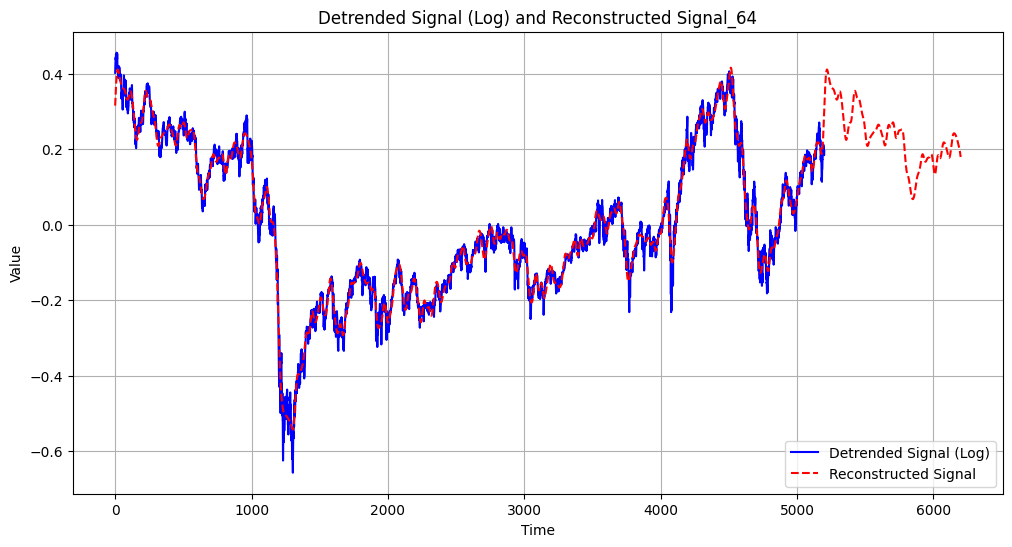

Restored prices saved to 'restored_prices_extended64.csv'


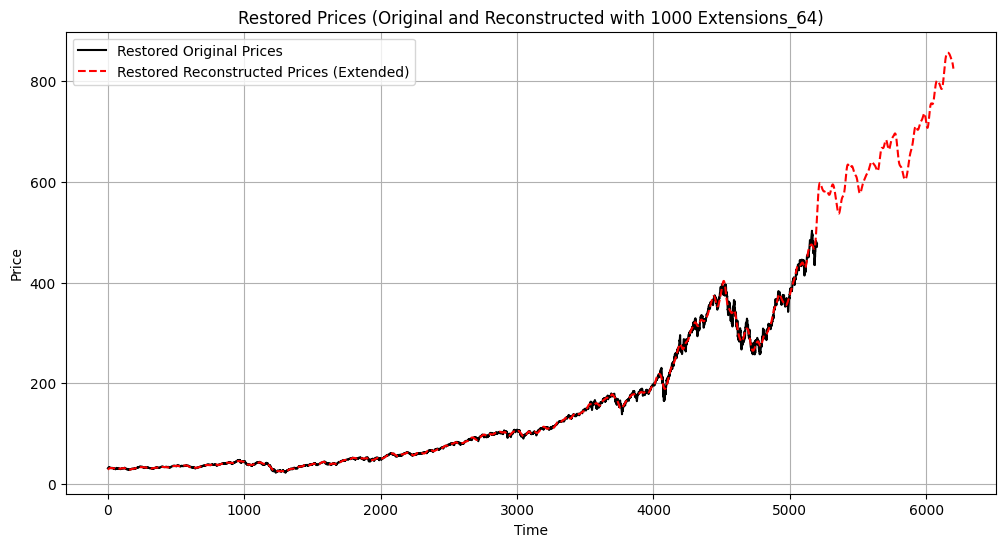

In [24]:
# 2004-01-01~2024-08-30일 QQQ데이터 ffn 
# n =64 : 주요 주파수 추출갯수
# 추가로 1000일간 추출주파수 프로젝션

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from sklearn.linear_model import LinearRegression

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기 및 로그 변환
adj_close_prices = data['Adj Close'].values
log_adj_close_prices = np.log(adj_close_prices)  # 로그 변환

# 2. 선형 회귀를 통해 로그 변환된 값에 대한 정사영 계산
t = np.arange(len(log_adj_close_prices)).reshape(-1, 1)
model = LinearRegression()
model.fit(t, log_adj_close_prices)
trend = model.predict(t)

# 로그 변환된 값에서 추세(정사영)를 제거한 값 계산
detrended_prices = log_adj_close_prices - trend

# 3. FFT를 사용한 주파수 분석
N = len(detrended_prices)
yf = fft(detrended_prices)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 4. 주요 주파수 성분 추출 (n개의 성분)
n = 64  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 5. 개별 주파수 성분으로 분해 및 시각화
reconstructed_signal = np.zeros(N)
for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    # 개별 주파수 성분의 코사인 함수
    cos_component = amplitude * np.cos(2.0 * np.pi * frequency * np.arange(N) + phase)
    
    # 신호 재구성에 사용
    reconstructed_signal += cos_component

# 6. 추가 1000개 타임 스텝 신호 생성
extended_N = 1000
extended_t = np.arange(extended_N)
reconstructed_signal_extended = np.zeros(extended_N)

for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    # 개별 주파수 성분의 코사인 함수 (1000개 타임 스텝)
    cos_component_extended = amplitude * np.cos(2.0 * np.pi * frequency * extended_t + phase)
    
    # 신호 재구성에 사용
    reconstructed_signal_extended += cos_component_extended

# 7. 원본 신호와 재구성된 신호를 CSV 파일로 저장 (1000개 추가 타임 스텝 포함)
# 추가된 1000개 신호를 포함한 전체 데이터 생성
full_reconstructed_signal = np.concatenate([reconstructed_signal, reconstructed_signal_extended])
full_t = np.arange(N + extended_N)

output_data_extended = pd.DataFrame({
    'Time': full_t,
    'Detrended Signal (Log)': np.concatenate([detrended_prices, np.full(extended_N, np.nan)]),  # 연장된 부분은 NaN으로 채움
    'Reconstructed Signal': full_reconstructed_signal
})

# CSV 파일로 저장
output_data_extended.to_csv('signal_data_extended64.csv', index=False)

print("Data saved to 'signal_data_extended64.csv'")

# ----------------------------
# 데이터 플로팅
# ----------------------------
plt.figure(figsize=(12, 6))

plt.plot(output_data_extended['Time'], output_data_extended['Detrended Signal (Log)'], color='blue', label='Detrended Signal (Log)')
plt.plot(output_data_extended['Time'], output_data_extended['Reconstructed Signal'], color='red', linestyle='--', label='Reconstructed Signal')

plt.title('Detrended Signal (Log) and Reconstructed Signal_64')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

# ----------------------------
# 복원 과정
# ----------------------------

# 1. 저장된 데이터 로드
restored_data = pd.read_csv('signal_data_extended64.csv')

# 2. 기존 데이터와 추가된 1000개 타임 스텝 분리
N = len(restored_data) - 1000  # 원래 데이터 길이 추정

# 3. 저장된 로그 변환된 데이터 로드
detrended_prices = restored_data['Detrended Signal (Log)'].values[:N]
reconstructed_signal = restored_data['Reconstructed Signal'].values

# 4. 추세 재계산
# 추세를 복원하기 위해서 선형 회귀 모델 사용
t = np.arange(N).reshape(-1, 1)
model = LinearRegression()
model.fit(t, log_adj_close_prices)  # 추세를 복원
trend = model.predict(t)

# 5. 로그 변환 역변환 (기존 신호)
restored_original_prices = np.exp(detrended_prices + trend)

# 6. 로그 변환 역변환 (1000개 확장된 신호 포함)
extended_t = np.arange(N + 1000).reshape(-1, 1)
full_trend = np.concatenate([trend, model.predict(np.arange(N, N + 1000).reshape(-1, 1))])
restored_reconstructed_prices = np.exp(reconstructed_signal + full_trend)

# 7. 결과를 CSV 파일로 저장
output_restored_data = pd.DataFrame({
    'Time': np.arange(N + 1000),
    'Restored Reconstructed Prices': restored_reconstructed_prices,
    'Restored Original Prices': np.concatenate([restored_original_prices, np.full(1000, np.nan)])
})

# CSV 파일로 저장
output_restored_data.to_csv('restored_prices_extended64.csv', index=False)

print("Restored prices saved to 'restored_prices_extended64.csv'")

# 8. 결과 출력 및 플로팅
plt.figure(figsize=(12, 6))

plt.plot(np.arange(N), restored_original_prices, color='black', label='Restored Original Prices')
plt.plot(np.arange(N + 1000), restored_reconstructed_prices, color='red', linestyle='--', label='Restored Reconstructed Prices (Extended)')

plt.title('Restored Prices (Original and Reconstructed with 1000 Extensions_64)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


In [21]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar, Holiday, Easter
from pandas.tseries.offsets import CustomBusinessDay, Day

# 1. 미국 주식시장의 Good Friday 정의 및 제외
good_friday = Holiday('Good Friday', year=None, month=1, day=1, offset=[Easter(), Day(-2)])  # 부활절 전 금요일

# 2. 주식 거래일 계산 (2024-01-01부터 10년간)
start_date = '2024-01-01'
end_date = '2034-01-01'

# 미국 공휴일 달력
us_holidays = USFederalHolidayCalendar().holidays(start=start_date, end=end_date)
# Good Friday를 추가하여 전체 휴일 리스트에 포함
all_holidays = us_holidays.append(pd.to_datetime(good_friday.dates(start_date, end_date)))

# 주말(토, 일)과 미국 공휴일을 제외한 영업일 계산
business_day = CustomBusinessDay(holidays=all_holidays)
trading_days = pd.date_range(start=start_date, end=end_date, freq=business_day)

# 3. 결과를 CSV 파일로 저장
trading_days_df = pd.DataFrame(trading_days, columns=['Trading Days'])
trading_days_df.to_csv('trading_days_without_good_friday_2024_2034.csv', index=False)

print("Trading days saved to 'trading_days_without_good_friday_2024_2034.csv'")


Trading days saved to 'trading_days_without_good_friday_2024_2034.csv'


Restored prices saved to 'restored_prices_extended.csv'


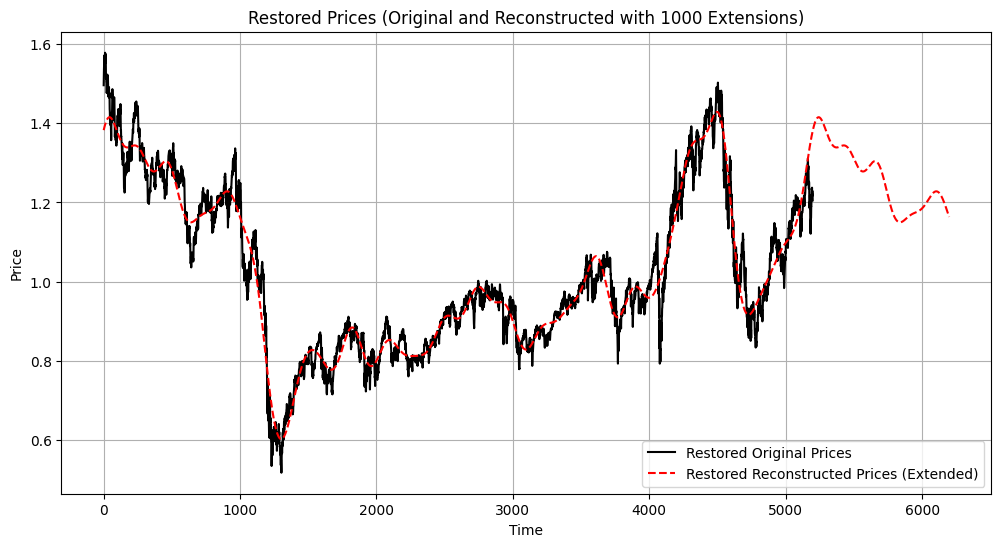

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. 저장된 데이터 로드
restored_data = pd.read_csv('signal_data_extended.csv')

# 2. 기존 데이터와 추가된 1000개 타임 스텝 분리
N = len(restored_data) - 1000  # 원래 데이터 길이 추정

# 3. 저장된 로그 변환된 데이터 로드
detrended_prices = restored_data['Detrended Signal (Log)'].values[:N]
reconstructed_signal = restored_data['Reconstructed Signal'].values

# 4. 추세 재계산
# 추세를 복원하기 위해서 선형 회귀 모델 사용
t = np.arange(N).reshape(-1, 1)
model = LinearRegression()
model.fit(t, detrended_prices + np.mean(detrended_prices))  # 추세를 복원
trend = model.predict(t)

# 5. 로그 변환 역변환 (기존 신호)
restored_original_prices = np.exp(detrended_prices + trend)

# 6. 로그 변환 역변환 (1000개 확장된 신호 포함)
extended_t = np.arange(N + 1000).reshape(-1, 1)
full_trend = np.concatenate([trend, model.predict(np.arange(N, N + 1000).reshape(-1, 1))])
restored_reconstructed_prices = np.exp(reconstructed_signal + full_trend)

# 7. 결과를 CSV 파일로 저장
output_restored_data = pd.DataFrame({
    'Time': np.arange(N + 1000),
    'Restored Reconstructed Prices': restored_reconstructed_prices,
    'Restored Original Prices': np.concatenate([restored_original_prices, np.full(1000, np.nan)])
})

# CSV 파일로 저장
output_restored_data.to_csv('restored_prices_extended.csv', index=False)

print("Restored prices saved to 'restored_prices_extended.csv'")

# 8. 결과 출력 및 플로팅
plt.figure(figsize=(12, 6))

plt.plot(np.arange(N), restored_original_prices, color='black', label='Restored Original Prices')
plt.plot(np.arange(N + 1000), restored_reconstructed_prices, color='red', linestyle='--', label='Restored Reconstructed Prices (Extended)')

plt.title('Restored Prices (Original and Reconstructed with 1000 Extensions)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


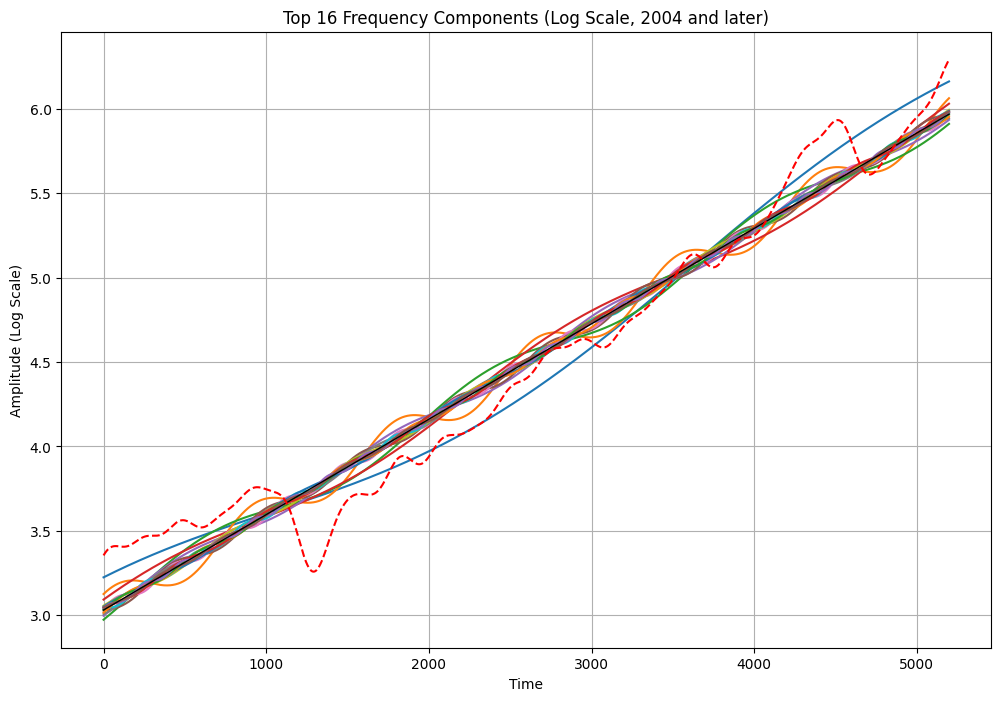

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from sklearn.linear_model import LinearRegression

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기 및 로그 변환
adj_close_prices = data['Adj Close'].values
log_adj_close_prices = np.log(adj_close_prices)  # 로그 변환

# 2. 선형 회귀를 통해 로그 변환된 값에 대한 정사영 계산
t = np.arange(len(log_adj_close_prices)).reshape(-1, 1)
model = LinearRegression()
model.fit(t, log_adj_close_prices)
trend = model.predict(t)

# 로그 변환된 값에서 추세(정사영)를 제거한 값 계산
detrended_prices = log_adj_close_prices - trend

# 3. FFT를 사용한 주파수 분석
N = len(detrended_prices)
yf = fft(detrended_prices)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 4. 주요 주파수 성분 추출 (n개의 성분)
n = 16  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 5. 개별 주파수 성분으로 분해 및 시각화
reconstructed_signal = np.zeros(N)

plt.figure(figsize=(12, 8))
for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    # 개별 주파수 성분의 코사인 함수
    cos_component = amplitude * np.cos(2.0 * np.pi * frequency * np.arange(N) + phase)
    
    # 신호 재구성에 사용
    reconstructed_signal += cos_component
    
    # 개별 성분 플로팅
    plt.plot(t, cos_component + trend, label=f'Freq {frequency:.2f} Hz')

# 6. 재구성된 신호에 원래 추세 추가
reconstructed_signal_with_trend = reconstructed_signal + trend

# 7. 정사영된 값과 재구성된 신호 플로팅
plt.plot(t, trend, color='black', linewidth=1, label='Linear Trend (Projection)')
plt.plot(t, reconstructed_signal_with_trend, linestyle='--', color='red', linewidth=1.5, label='Reconstructed Signal')

plt.title(f'Top {n} Frequency Components (Log Scale, 2004 and later)')
plt.xlabel('Time')
plt.ylabel('Amplitude (Log Scale)')
plt.grid(True)
plt.show()


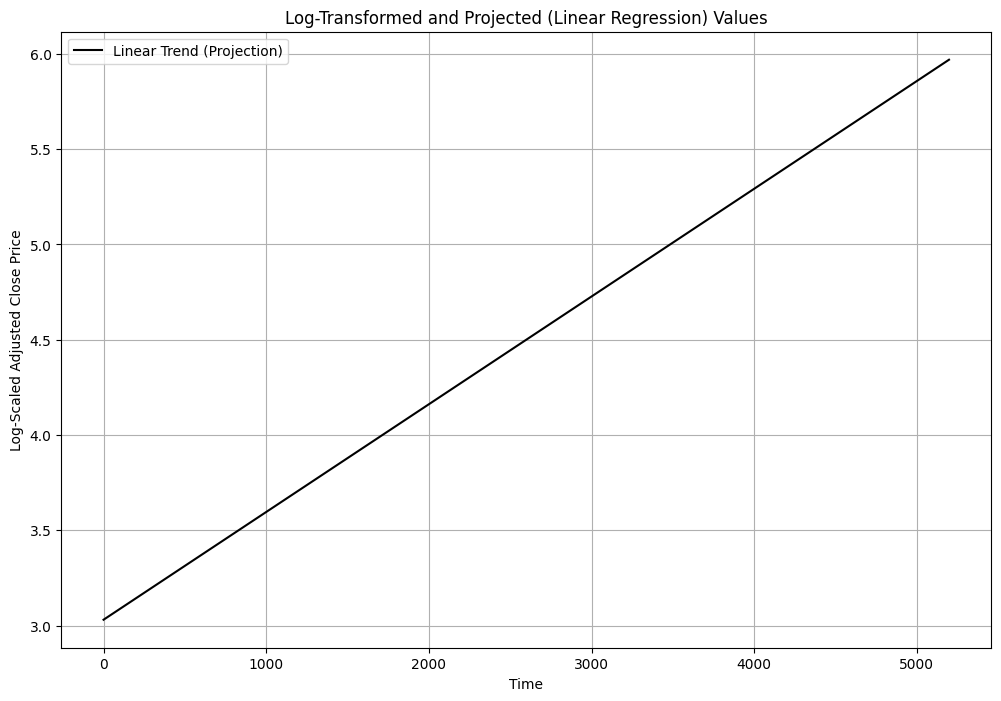

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기 및 로그 변환
adj_close_prices = data['Adj Close'].values
log_adj_close_prices = np.log(adj_close_prices)  # 로그 변환

# 2. 선형 회귀를 통해 로그 변환된 값에 대한 정사영 계산
t = np.arange(len(log_adj_close_prices)).reshape(-1, 1)
model = LinearRegression()
model.fit(t, log_adj_close_prices)
trend = model.predict(t)

# 3. 정사영된 값(선형 추세) 플로팅
plt.figure(figsize=(12, 8))
plt.plot(t, trend, color='black', linewidth=1.5, label='Linear Trend (Projection)')

plt.title('Log-Transformed and Projected (Linear Regression) Values')
plt.xlabel('Time')
plt.ylabel('Log-Scaled Adjusted Close Price')
plt.grid(True)
plt.legend()
plt.show()


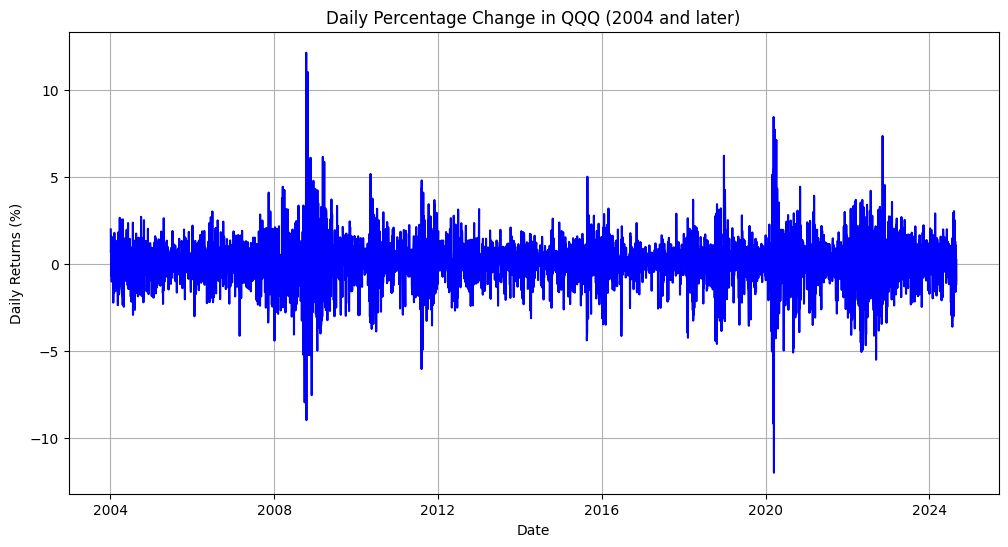

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기
adj_close_prices = data['Adj Close'].values

# 2. 전일 대비 증감율 계산
daily_returns = (adj_close_prices[1:] - adj_close_prices[:-1]) / adj_close_prices[:-1] * 100

# 3. 날짜 축 생성 (하루 적게 설정)
dates = data['Date'].values[1:]

# 4. 전일 대비 증감율 플로팅
plt.figure(figsize=(12, 6))
plt.plot(dates, daily_returns, label='Daily Returns (%)', color='blue')
plt.title('Daily Percentage Change in QQQ (2004 and later)')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.grid(True)
plt.show()


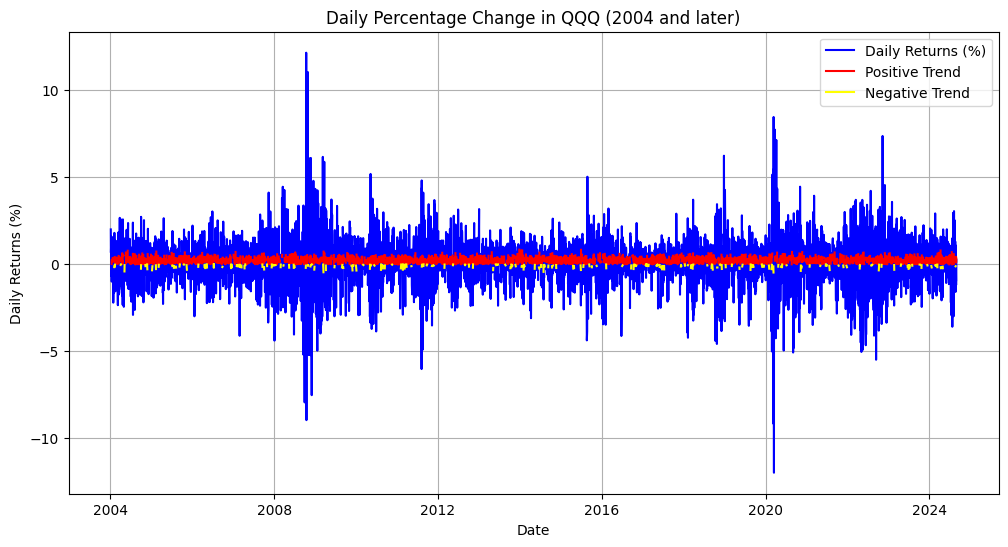

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기
adj_close_prices = data['Adj Close'].values

# 2. 전일 대비 증감율 계산
daily_returns = (adj_close_prices[1:] - adj_close_prices[:-1]) / adj_close_prices[:-1] * 100

# 3. 날짜 축 생성 (하루 적게 설정)
dates = data['Date'].values[1:]

# 4. FFT를 사용한 주파수 분석
N = len(daily_returns)
yf = fft(daily_returns)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 5. 주요 주파수 성분 추출 (n개의 성분)
n = 16  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 6. 사인 및 코사인 함수로 변환하여 추세선 생성
reconstructed_signal = np.zeros(N)
t = np.arange(N)

for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    cos_component = amplitude * np.cos(2.0 * np.pi * frequency * t + phase)
    
    # 신호 재구성
    reconstructed_signal += cos_component

# 7. 양수와 음수 부분 분리하여 추세선 생성
positive_trend = np.where(reconstructed_signal > 0, reconstructed_signal, np.nan)
negative_trend = np.where(reconstructed_signal < 0, reconstructed_signal, np.nan)

# 8. 플로팅
plt.figure(figsize=(12, 6))

# 원본 신호
plt.plot(dates, daily_returns, label='Daily Returns (%)', color='blue')

# 양수 부분의 추세선 (빨간색)
plt.plot(dates, positive_trend, label='Positive Trend', color='red')

# 음수 부분의 추세선 (노란색)
plt.plot(dates, negative_trend, label='Negative Trend', color='yellow')

plt.title('Daily Percentage Change in QQQ (2004 and later)')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.grid(True)
plt.legend()
plt.show()


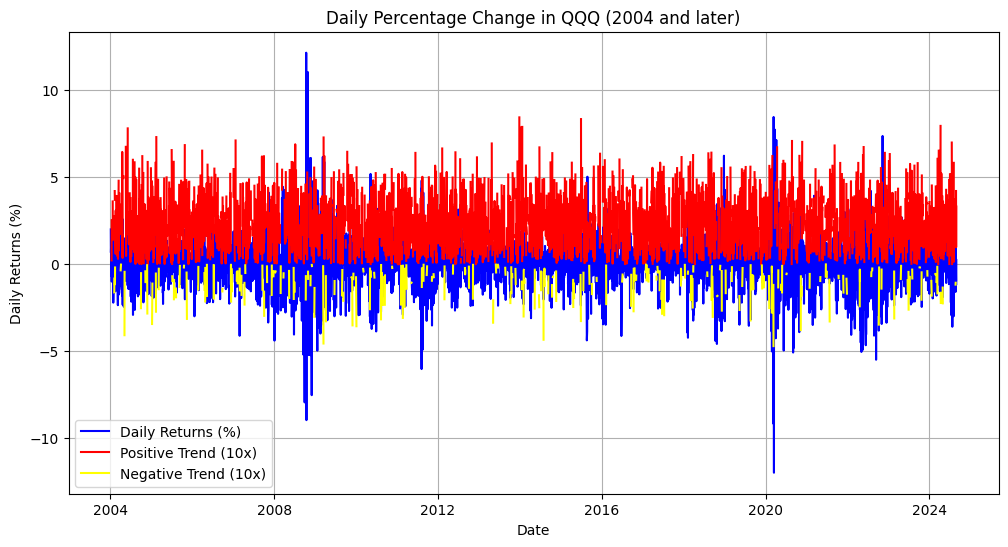

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기
adj_close_prices = data['Adj Close'].values

# 2. 전일 대비 증감율 계산
daily_returns = (adj_close_prices[1:] - adj_close_prices[:-1]) / adj_close_prices[:-1] * 100

# 3. 날짜 축 생성 (하루 적게 설정)
dates = data['Date'].values[1:]

# 4. FFT를 사용한 주파수 분석
N = len(daily_returns)
yf = fft(daily_returns)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 5. 주요 주파수 성분 추출 (n개의 성분)
n = 16  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 6. 사인 및 코사인 함수로 변환하여 추세선 생성
reconstructed_signal = np.zeros(N)
t = np.arange(N)

for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    cos_component = amplitude * np.cos(2.0 * np.pi * frequency * t + phase)
    
    # 신호 재구성
    reconstructed_signal += cos_component

# 7. 양수와 음수 부분 분리하여 추세선 생성 및 10배 증폭
positive_trend = np.where(reconstructed_signal > 0, 10 * reconstructed_signal, np.nan)
negative_trend = np.where(reconstructed_signal < 0, 10 * reconstructed_signal, np.nan)

# 8. 플로팅
plt.figure(figsize=(12, 6))

# 원본 신호
plt.plot(dates, daily_returns, label='Daily Returns (%)', color='blue')

# 양수 부분의 추세선 (빨간색, 10배 증폭)
plt.plot(dates, positive_trend, label='Positive Trend (10x)', color='red')

# 음수 부분의 추세선 (노란색, 10배 증폭)
plt.plot(dates, negative_trend, label='Negative Trend (10x)', color='yellow')

plt.title('Daily Percentage Change in QQQ (2004 and later)')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.grid(True)
plt.legend()
plt.show()


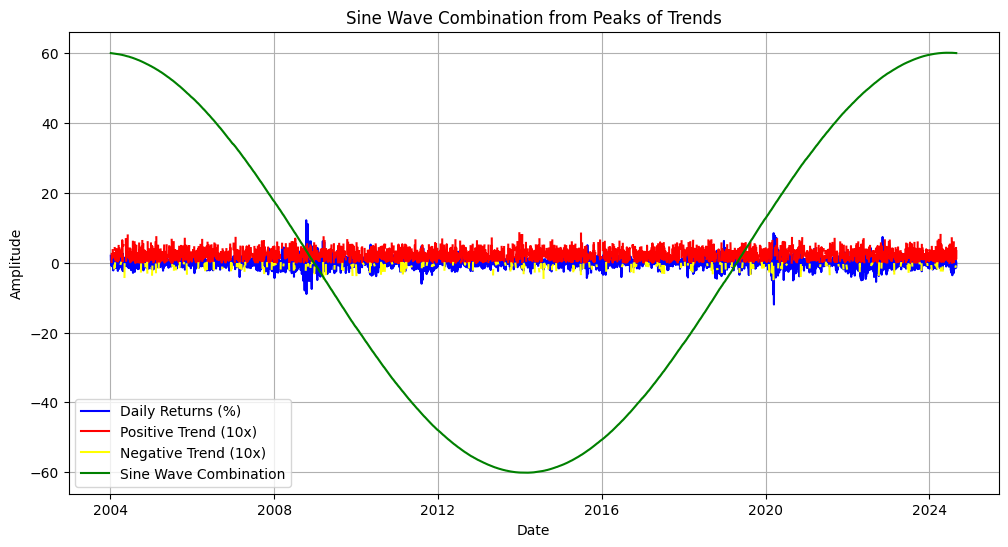

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import find_peaks

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기
adj_close_prices = data['Adj Close'].values

# 2. 전일 대비 증감율 계산
daily_returns = (adj_close_prices[1:] - adj_close_prices[:-1]) / adj_close_prices[:-1] * 100

# 3. 날짜 축 생성 (하루 적게 설정)
dates = data['Date'].values[1:]

# 4. FFT를 사용한 주파수 분석
N = len(daily_returns)
yf = fft(daily_returns)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 5. 주요 주파수 성분 추출 (n개의 성분)
n = 16  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 6. 사인 및 코사인 함수로 변환하여 추세선 생성
reconstructed_signal = np.zeros(N)
t = np.arange(N)

for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    cos_component = amplitude * np.cos(2.0 * np.pi * frequency * t + phase)
    
    # 신호 재구성
    reconstructed_signal += cos_component

# 7. 양수와 음수 부분 분리하여 추세선 생성 및 10배 증폭
positive_trend = np.where(reconstructed_signal > 0, 10 * reconstructed_signal, np.nan)
negative_trend = np.where(reconstructed_signal < 0, 10 * reconstructed_signal, np.nan)

# 8. 꼭지점 찾기
positive_peaks, _ = find_peaks(positive_trend)
negative_peaks, _ = find_peaks(-negative_trend)  # 음수 피크는 반대로 처리

# 9. 사인파 조합 생성
sin_wave_combination = np.zeros(N)
for idx in positive_peaks:
    amplitude = positive_trend[idx]
    sin_wave_combination += amplitude * np.sin(2 * np.pi * t / N + (2 * np.pi * idx / N))

for idx in negative_peaks:
    amplitude = negative_trend[idx]
    sin_wave_combination += amplitude * np.sin(2 * np.pi * t / N + (2 * np.pi * idx / N))

# 10. 플로팅
plt.figure(figsize=(12, 6))

# 원본 신호
plt.plot(dates, daily_returns, label='Daily Returns (%)', color='blue')

# 양수 부분의 추세선 (빨간색, 10배 증폭)
plt.plot(dates, positive_trend, label='Positive Trend (10x)', color='red')

# 음수 부분의 추세선 (노란색, 10배 증폭)
plt.plot(dates, negative_trend, label='Negative Trend (10x)', color='yellow')

# 사인파 조합
plt.plot(dates, sin_wave_combination, label='Sine Wave Combination', color='green')

plt.title('Sine Wave Combination from Peaks of Trends')
plt.xlabel('Date')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


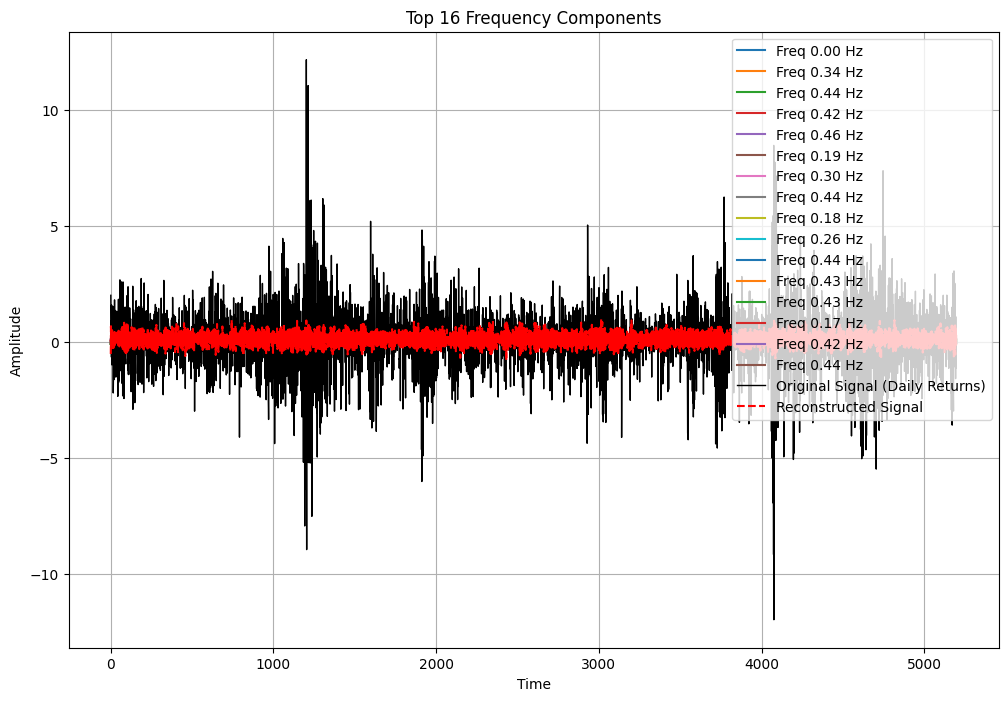

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기
adj_close_prices = data['Adj Close'].values

# 2. 전일 대비 증감율 계산
daily_returns = (adj_close_prices[1:] - adj_close_prices[:-1]) / adj_close_prices[:-1] * 100

# 3. FFT를 사용한 주파수 분석
N = len(daily_returns)
yf = fft(daily_returns)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 4. 주요 주파수 성분 추출 (n개의 성분)
n = 16  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 5. 사인 및 코사인 함수로 변환
reconstructed_signal = np.zeros(N)
t = np.arange(N)

plt.figure(figsize=(12, 8))
for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    cos_component = amplitude * np.cos(2.0 * np.pi * frequency * t + phase)
    
    # 시그널 재구성
    reconstructed_signal += cos_component
    
    # 개별 사인/코사인 함수를 플로팅
    plt.plot(t, cos_component, label=f'Freq {frequency:.2f} Hz')

# 6. 원본 신호와 재구성된 신호 플로팅
plt.plot(t, daily_returns, label='Original Signal (Daily Returns)', color='black', linewidth=1)
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', linestyle='--', color='red', linewidth=1.5)

plt.title(f'Top {n} Frequency Components')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


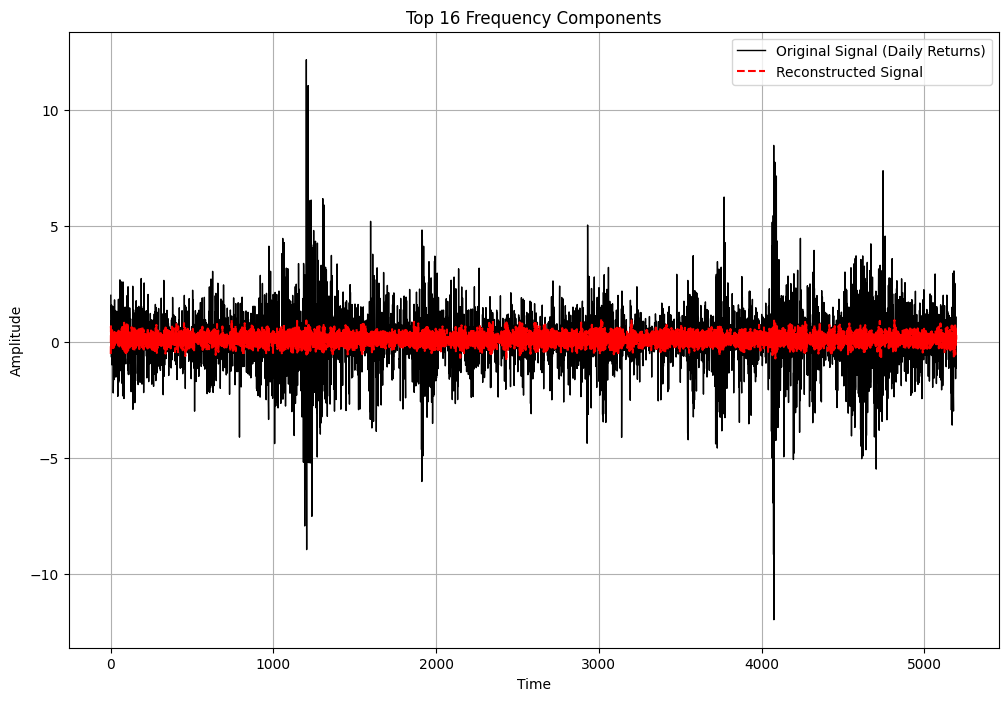

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 1. CSV 파일에서 데이터 로드
file_path = 'qqq_2000.csv'
data = pd.read_csv(file_path)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'])

# 2004년 이후의 데이터 필터링
data = data[data['Date'] >= '2004-01-01']

# 'Adj Close' 열에서 데이터 가져오기
adj_close_prices = data['Adj Close'].values

# 2. 전일 대비 증감율 계산
daily_returns = (adj_close_prices[1:] - adj_close_prices[:-1]) / adj_close_prices[:-1] * 100

# 3. FFT를 사용한 주파수 분석
N = len(daily_returns)
yf = fft(daily_returns)
xf = fftfreq(N, 1.0)[:N//2]  # 샘플 간격을 1로 설정

# 4. 주요 주파수 성분 추출 (n개의 성분)
n = 16  # 사용할 주요 주파수 성분의 수
indices = np.argsort(-np.abs(yf[:N//2]))[:n]  # 주파수 성분의 크기가 큰 상위 n개 선택

# 5. 사인 및 코사인 함수로 변환
reconstructed_signal = np.zeros(N)
t = np.arange(N)

for idx in indices:
    amplitude = 2.0 / N * np.abs(yf[idx])
    phase = np.angle(yf[idx])
    frequency = xf[idx]
    
    cos_component = amplitude * np.cos(2.0 * np.pi * frequency * t + phase)
    
    # 신호 재구성
    reconstructed_signal += cos_component

# 6. 원본 신호와 재구성된 신호 플로팅 (검은 선과 점선만 표시)
plt.figure(figsize=(12, 8))
plt.plot(t, daily_returns, label='Original Signal (Daily Returns)', color='black', linewidth=1)
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', linestyle='--', color='red', linewidth=1.5)

plt.title(f'Top {n} Frequency Components')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
